# HW6

# Student Name: Hung Yi-Le

# USC ID: 3941176047

# GITHUB: ZackLa

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
import seaborn as sns 
#from decimal import Decimal
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

# (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu- meric.


In [2]:
d_test = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = 20, na_values = "na")
d_train = pd.read_csv('../data/aps_failure_training_set.csv', skiprows = 20, na_values = "na")

In [3]:
d_train1 = d_train.copy()
d_test1 = d_test.copy()

# (b) Data Preparation 
# This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 1


## i. Research what types of techniques are usually used for dealing with data with missing values.2 Pick at least one of them and apply it to this data in the next steps.

### There are either you can add mean or median or the most common data when dealing with missing values.

In [4]:
d_train = d_train.drop(columns = "class")
d_test = d_test.drop(columns = "class")

In [5]:
## fillout all hte missing values
d_train = d_train.fillna(d_train.median())
d_test = d_test.fillna(d_train.median())

In [6]:
d_train.mean()

aa_000    5.933650e+04
ab_000    1.625000e-01
ac_000    3.362258e+08
ad_000    1.434383e+05
ae_000    6.535000e+00
              ...     
ee_007    3.428586e+05
ee_008    1.372212e+05
ee_009    8.295099e+03
ef_000    8.646667e-02
eg_000    2.031000e-01
Length: 170, dtype: float64

In [7]:
d_train

aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0       76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1       33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
2       41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3          12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4       60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
...       ...     ...           ...     ...     ...     ...     ...     ...   
59995  153002     0.0  6.640000e+02   186.0     0.0     0.0     0.0     0.0   
59996    2286     0.0  2.130707e+09   224.0     0.0     0.0     0.0     0.0   
59997     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0     0.0   
59998   80292     0.0  2.130706e+09   494.0     0.0     0.0     0.0     0.0   
59999   40222     0.0  6.980000e+02   628.0     0.0     0.0     0.0     0.0   

       ag_002  ag_003  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0   318.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0  2564.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 170 columns]

In [8]:
d_train1['class']

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

In [9]:
d_train = pd.concat([d_train, d_train1['class']], axis = 1)
d_test = pd.concat([d_test, d_test1['class']], axis = 1)

In [10]:
d_train2 = d_train.copy()
d_test2 = d_test.copy()

In [11]:
d_train2 = d_train2.drop(columns = "class")
d_test2 = d_test2.drop(columns = "class")

## ii. For each of the 170 features, calculate the coefficient of variation CV = m/s , where s is sample standard deviation and m is sample mean.

In [12]:
df = pd.concat([d_train2,d_test2])
df = df.reset_index()
df = df.drop(columns = "index")
df1 = df.copy()

In [13]:
df1

aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0       76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1       33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
2       41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3          12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4       60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
...       ...     ...           ...     ...     ...     ...     ...     ...   
75995   81852     0.0  2.130706e+09   892.0     0.0     0.0     0.0     0.0   
75996      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0     0.0   
75997   79636     0.0  1.670000e+03  1518.0     0.0     0.0     0.0     0.0   
75998     110     0.0  3.600000e+01    32.0     0.0     0.0     0.0     0.0   
75999       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0     0.0   

       ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0         0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1         0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2         0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3         0.0   318.0  ...      240.0      46.0      58.0      44.0      10.0   
4         0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   
...       ...     ...  ...        ...       ...       ...       ...       ...   
75995     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0  349840.0   
75996     0.0     0.0  ...      266.0      44.0      46.0      14.0       2.0   
75997     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0  375498.0   
75998     0.0     0.0  ...      588.0     210.0     180.0     544.0    1004.0   
75999     0.0     0.0  ...       46.0      10.0      48.0      14.0      42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0      157956.0   73224.0      0.0     0.0     0.0  
1       81140.0   97576.0   1500.0     0.0     0.0  
2      158022.0   95128.0    514.0     0.0     0.0  
3           0.0       0.0      0.0     4.0    32.0  
4      311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
75995  317840.0  960024.0  25566.0     0.0     0.0  
75996       0.0       0.0      0.0     0.0     0.0  
75997  222866.0  358934.0  19548.0     0.0     0.0  
75998    1338.0      74.0      0.0     0.0     0.0  
75999      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 170 columns]

In [14]:
std = []
mean = []
cv = []
for i in df1.columns:
    std.append(statistics.stdev(df1[i]))
    mean.append(statistics.mean(df1[i]))
    if statistics.mean(df1[i]) == 0:
        k = 0
        cv.append(k)
    else:
        k = statistics.stdev(df1[i])/statistics.mean(df1[i])
        cv.append(k)

In [15]:
df2 = pd.DataFrame()
df2 = df2.assign(SampleStd = std, SampleMean = mean, Coefficient_of_variation = cv)
df2 = df2.set_axis(df1.columns)

In [16]:
df2.round(5)

SampleStd    SampleMean  Coefficient_of_variation
aa_000  2.647366e+05  6.115976e+04                   4.32861
ab_000  1.609490e+00  1.652400e-01                   9.74052
ac_000  7.769769e+08  3.364557e+08                   2.30930
ad_000  3.113852e+07  1.133169e+05                 274.79158
ae_000  1.501976e+02  6.454180e+00                  23.27136
...              ...           ...                       ...
ee_007  1.698180e+06  3.440811e+05                   4.93541
ee_008  4.667837e+05  1.383515e+05                   3.37390
ee_009  4.848501e+04  8.329316e+03                   5.82101
ef_000  4.082660e+00  8.129000e-02                  50.22368
eg_000  9.999690e+00  2.090000e-01                  47.84539

[170 rows x 3 columns]

### The Coefficient_of_variation was caculated in above dataframe.

## iii. Plot a correlation matrix for your features using pandas or any other tool.

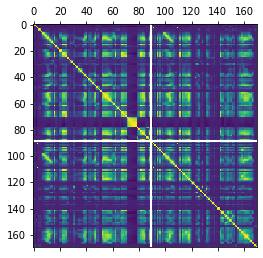

In [17]:
plt.matshow(df.corr())

### Graph of the correlation matrix is plotted as above.

## iv. Pick ⌊ sqrt(170)⌋ features with highest CV , and make scatter plots and box plots for them, similar to those on p.129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [18]:
df2

SampleStd    SampleMean  Coefficient_of_variation
aa_000  2.647366e+05  6.115976e+04                  4.328608
ab_000  1.609493e+00  1.652368e-01                  9.740521
ac_000  7.769769e+08  3.364557e+08                  2.309299
ad_000  3.113852e+07  1.133169e+05                274.791581
ae_000  1.501976e+02  6.454184e+00                 23.271357
...              ...           ...                       ...
ee_007  1.698180e+06  3.440811e+05                  4.935407
ee_008  4.667837e+05  1.383515e+05                  3.373896
ee_009  4.848501e+04  8.329316e+03                  5.821008
ef_000  4.082657e+00  8.128947e-02                 50.223681
eg_000  9.999687e+00  2.090000e-01                 47.845392

[170 rows x 3 columns]

In [19]:
df3 = pd.DataFrame(df2['Coefficient_of_variation'].nlargest(round(math.sqrt(170))))
df3

Coefficient_of_variation
cf_000                275.595820
co_000                275.068138
ad_000                274.791581
cs_009                194.720937
dj_000                130.915233
dh_000                120.759504
df_000                119.384411
as_000                115.082077
ag_000                 92.507510
au_000                 86.992248
ak_000                 84.875146
az_009                 78.895508
ay_009                 78.350868

In [20]:
# reorder columns
col = list(df.columns)
cols = col[1:] + [col[0]]
df = df[cols]

In [21]:
df4 = df[df3.index]
df4

cf_000  co_000  ad_000  cs_009  dj_000  dh_000  df_000  as_000  ag_000  \
0         2.0   220.0   280.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         2.0     8.0   126.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0   100.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         2.0     2.0    66.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0   202.0   458.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
75995     2.0    42.0   892.0     0.0     0.0     0.0     0.0     0.0     0.0   
75996     2.0     0.0    46.0     0.0     0.0     0.0     0.0     0.0     0.0   
75997     2.0   378.0  1518.0     0.0     0.0     0.0     0.0     0.0     0.0   
75998     0.0     0.0    32.0     0.0     0.0     0.0     0.0     0.0     0.0   
75999     0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0     0.0   

       au_000  ak_000  az_009  ay_009  
0         0.0     0.0     0.0     0.0  
1         0.0     0.0     0.0     0.0  
2         0.0     0.0     0.0     0.0  
3         0.0     0.0     0.0     0.0  
4         0.0     0.0     0.0     0.0  
...       ...     ...     ...     ...  
75995     0.0     0.0     0.0     0.0  
75996     0.0     0.0     0.0     0.0  
75997     0.0     0.0     0.0     0.0  
75998     0.0     0.0     0.0     0.0  
75999     0.0     0.0     0.0     0.0  

[76000 rows x 13 columns]

In [22]:
df5 = pd.concat([d_train,d_test])
df5 = df5.reset_index()
df5 = df5.drop(columns = "index")

In [23]:
df5

aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0       76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1       33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0     0.0   
2       41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3          12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4       60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
...       ...     ...           ...     ...     ...     ...     ...     ...   
75995   81852     0.0  2.130706e+09   892.0     0.0     0.0     0.0     0.0   
75996      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0     0.0   
75997   79636     0.0  1.670000e+03  1518.0     0.0     0.0     0.0     0.0   
75998     110     0.0  3.600000e+01    32.0     0.0     0.0     0.0     0.0   
75999       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0     0.0   

       ag_002  ag_003  ...    ee_003    ee_004    ee_005    ee_006    ee_007  \
0         0.0     0.0  ...  493384.0  721044.0  469792.0  339156.0  157956.0   
1         0.0     0.0  ...  178064.0  293306.0  245416.0  133654.0   81140.0   
2         0.0     0.0  ...  159812.0  423992.0  409564.0  320746.0  158022.0   
3         0.0   318.0  ...      46.0      58.0      44.0      10.0       0.0   
4         0.0     0.0  ...  229790.0  405298.0  347188.0  286954.0  311560.0   
...       ...     ...  ...       ...       ...       ...       ...       ...   
75995     0.0     0.0  ...  273242.0  510354.0  373918.0  349840.0  317840.0   
75996     0.0     0.0  ...      44.0      46.0      14.0       2.0       0.0   
75997     0.0     0.0  ...  449962.0  778826.0  581558.0  375498.0  222866.0   
75998     0.0     0.0  ...     210.0     180.0     544.0    1004.0    1338.0   
75999     0.0     0.0  ...      10.0      48.0      14.0      42.0      46.0   

         ee_008   ee_009  ef_000  eg_000  class  
0       73224.0      0.0     0.0     0.0    neg  
1       97576.0   1500.0     0.0     0.0    neg  
2       95128.0    514.0     0.0     0.0    neg  
3           0.0      0.0     4.0    32.0    neg  
4      433954.0   1218.0     0.0     0.0    neg  
...         ...      ...     ...     ...    ...  
75995  960024.0  25566.0     0.0     0.0    neg  
75996       0.0      0.0     0.0     0.0    neg  
75997  358934.0  19548.0     0.0     0.0    neg  
75998      74.0      0.0     0.0     0.0    neg  
75999       0.0      0.0     0.0     0.0    neg  

[76000 rows x 171 columns]

In [24]:
df4 = df5[df3.index]
df4 = pd.concat([df4, df5.iloc[:,-1]], axis = 1)
df4 = df4.replace(["neg","pos"],["0","1"])

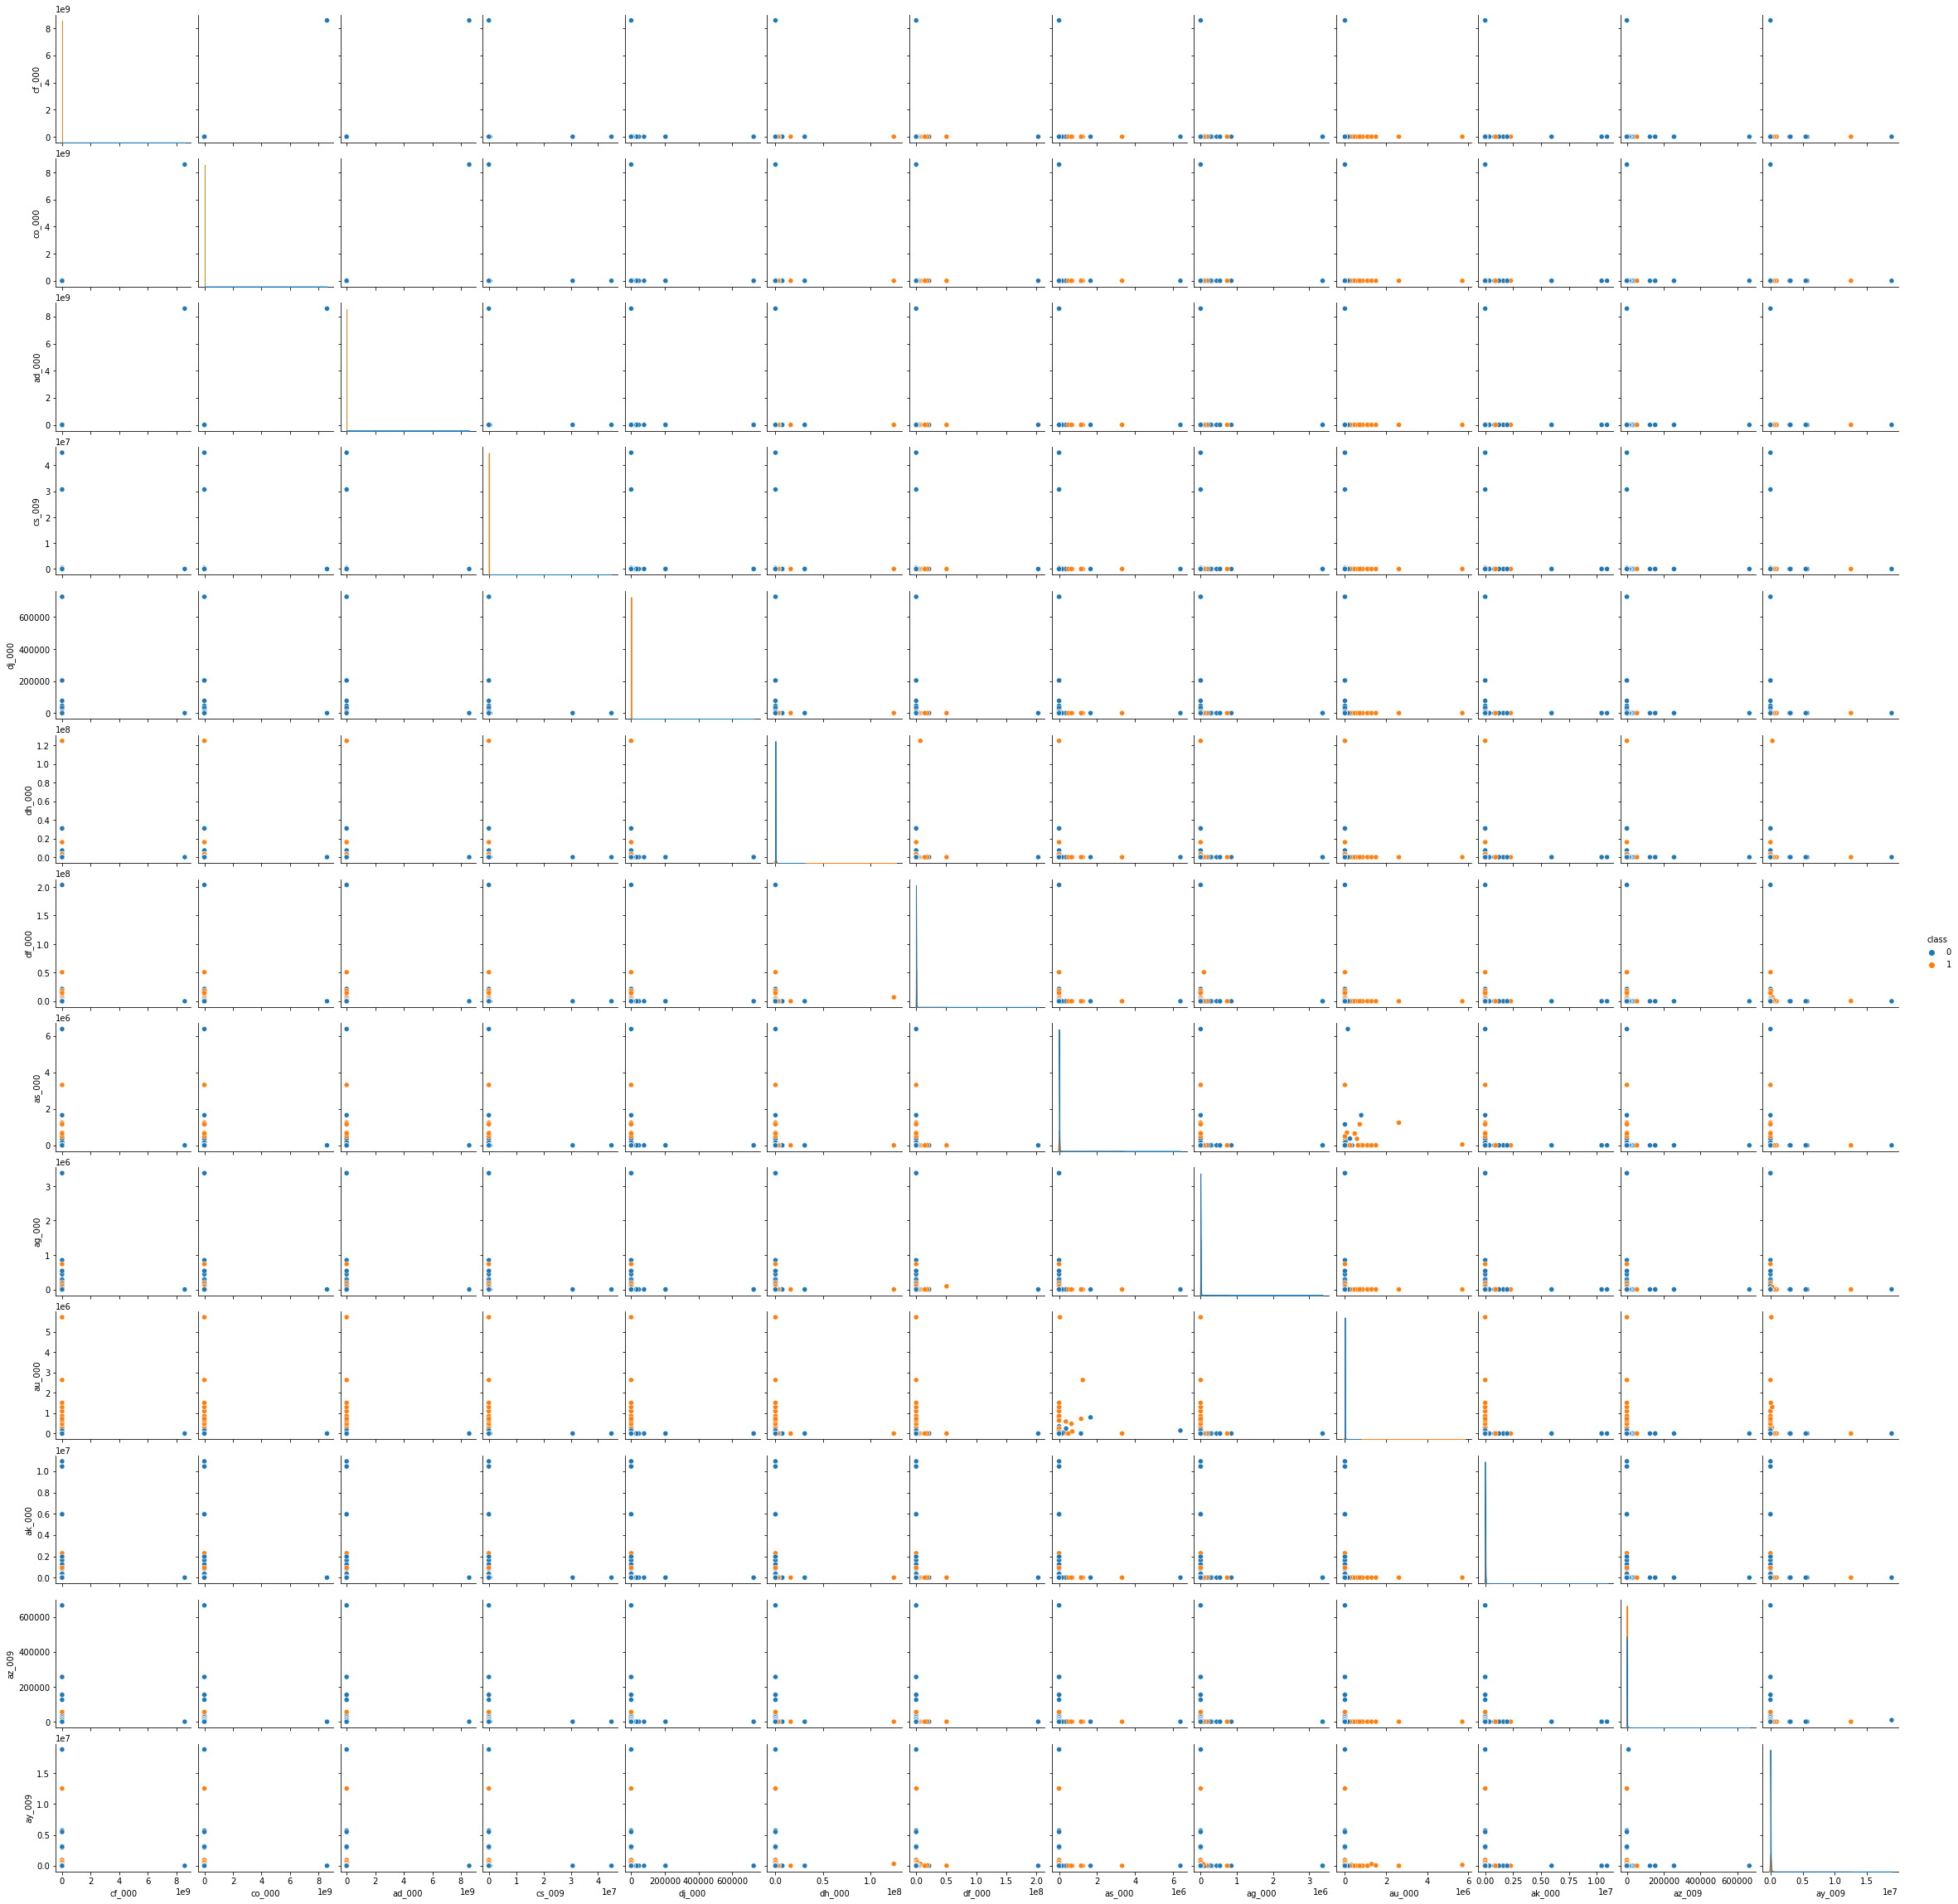

In [25]:
sns.pairplot(df4, hue = "class")

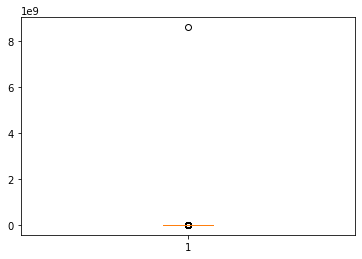

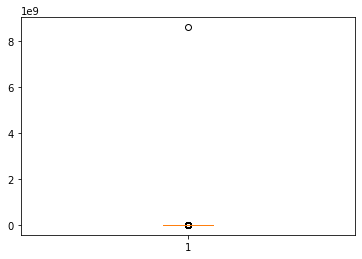

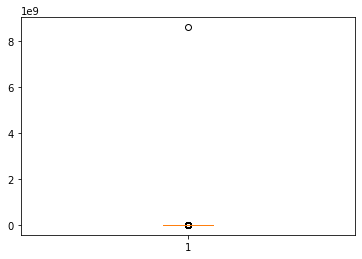

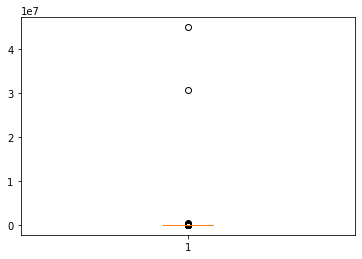

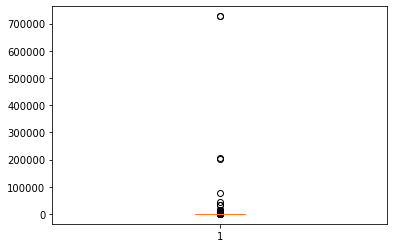

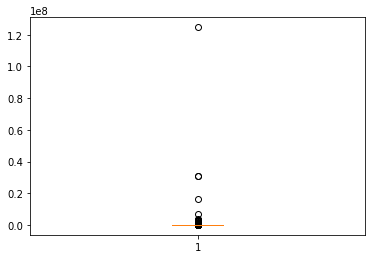

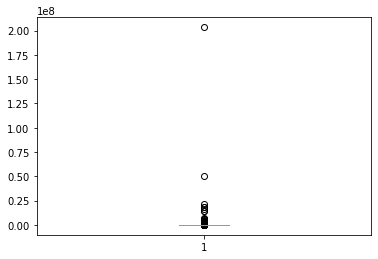

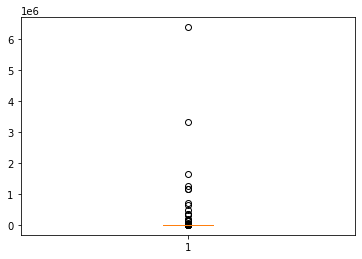

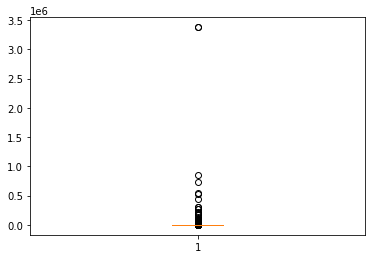

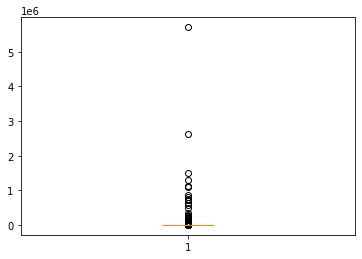

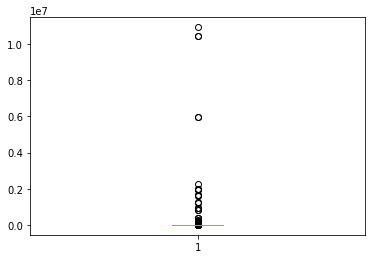

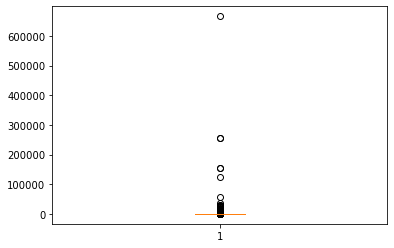

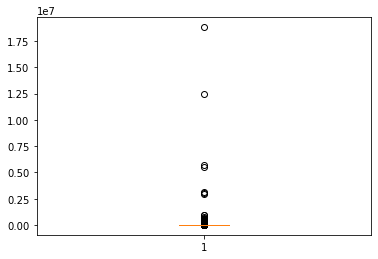

In [26]:
for i in df4.drop(columns = "class").columns:
    plt.boxplot(df4[i])
    plt.show()

### I cant have any conclusion by just looking at the scatter plot.

## v. Determine the number of positive and negative data. Is this data set imbalanced?

### Yes it is imbalanced, because there are only 13 hundred positive data out of 76000 data (Total).

# (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [27]:
x_train = d_train.iloc[:,:170]
x_test = d_test.iloc[:,:170]
y_train = d_train.iloc[:,-1]
y_test = d_test.iloc[:,-1]

In [28]:
y_train = y_train.replace(["neg","pos"],["0","1"])
y_test = y_test.replace(["neg","pos"],["0","1"])

In [29]:
clf = RandomForestClassifier(max_depth=2, random_state=0, oob_score = True)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, oob_score=True, random_state=0)

In [30]:
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)

In [31]:
## Misclassification for training data set.
df_confusion = pd.DataFrame(confusion_matrix(y_train, y_pred1))
df_confusion = df_confusion.rename_axis(index = 'True', columns = 'Predicted')
df_confusion
#df_confusion = pd.DataFrame(confusion_matrix(y_pred, y_train))

Predicted      0    1
True                 
0          58976   24
1            813  187

### Confusion matrix for training data set is shown as above.

In [32]:
clf.score(x_test, y_test)

0.9808125

In [33]:
y_score = clf.predict_proba(x_train)
fpr, tpr, thresholds = roc_curve(y_train.astype('int'), y_score[:,1], pos_label = 1)
auc1 = auc(fpr, tpr)

In [34]:
auc1

0.972297033898305

(0.0, 1.1)

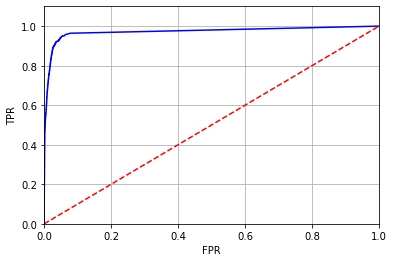

In [35]:
plt.plot(fpr, tpr, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for the training data set is shown as above. The AUC is about 0.972297033898305.

In [36]:
## misclassification for test sets.
df1_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred))
df1_confusion = df1_confusion.rename_axis(index = 'True', columns = 'Predicted')
df1_confusion

Predicted      0   1
True                
0          15623   2
1            305  70

### Confusion matrix for test data set is shown as above.

In [37]:
y_score1 = clf.predict_proba(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test.astype('int'), y_score1[:,1], pos_label = 1)
auc2 = auc(fpr1, tpr1)

In [38]:
auc2

0.9805332480000001

(0.0, 1.1)

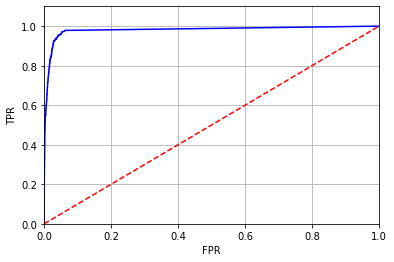

In [39]:
plt.plot(fpr1, tpr1, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for test data set is shown as above. AUC is about 0.9805332480000001

In [40]:
# out of bag error
1 - clf.oob_score_

0.014050000000000007

In [41]:
# test error
1 - clf.score(x_test, y_test)

0.019187500000000024

In [42]:
# train error
1 - clf.score(x_train, y_train)

0.013950000000000018

### The out of bag error is about 0.01405, test error is about 0.0191875, and the trining error is about 0.01395. Out of bad error is lower than the test error.

# (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [43]:
clf = RandomForestClassifier(max_depth=2, random_state=0, oob_score = True, class_weight = "balanced")
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, oob_score=True,
                       random_state=0)

In [44]:
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)

In [45]:
## Misclassification for training data set.
df_confusion = pd.DataFrame(confusion_matrix(y_train, y_pred1))
df_confusion = df_confusion.rename_axis(index = 'True', columns = 'Predicted')
df_confusion

Predicted      0     1
True                  
0          55214  3786
1             52   948

### Confusion matrix for training data set is shown as above.

In [46]:
y_score2 = clf.predict_proba(x_train)
fpr2, tpr2, thresholds2 = roc_curve(y_train.astype('int'), y_score2[:,1], pos_label = 1)
auc3 = auc(fpr2, tpr2)

In [47]:
auc3

0.9769243474576272

(0.0, 1.1)

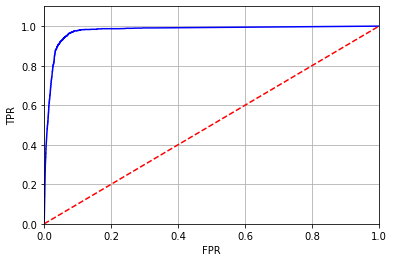

In [48]:
plt.plot(fpr2, tpr2, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for the training data set is shown as above. The AUC is about 0.9769243474576272.

In [49]:
## misclassification for test sets.
df1_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred))
df1_confusion = df1_confusion.rename_axis(index = 'True', columns = 'Predicted')
df1_confusion

Predicted      0    1
True                 
0          14676  949
1             13  362

### Confusion matrix for test data set is shown as above.

In [50]:
y_score3 = clf.predict_proba(x_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test.astype('int'), y_score3[:,1], pos_label = 1)
auc4 = auc(fpr3, tpr3)

In [51]:
auc4

0.9835897173333333

(0.0, 1.1)

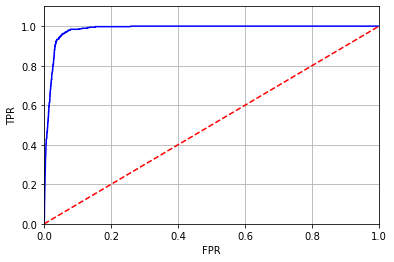

In [52]:
plt.plot(fpr3, tpr3, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for the training data set is shown as above. The AUC is about 0.9835897173333333.

In [53]:
# out of bag error
1 - clf.oob_score_

0.06420000000000003

In [54]:
# test error
1 - clf.score(x_test, y_test)

0.060124999999999984

In [55]:
# train error
1 - clf.score(x_train, y_train)

0.06396666666666662

### For a model compensate class imbalanced, out of bad error is about 0.0642, test error is about 0.060124999999999984, and the training error is about 0.06396666666666662. Out of bad error is higher than test error. Set class_weight to balanced will help the imblaced data.

### Overall, the result in (d) is worse than (c). because every error are higher.

# (e) XGBoost and Model Trees
# In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used, thus it is more general. 
# In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. 
# One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. 
# You can use XGBoost to fit the model tree. 
# Determine α (the regularization term) using cross-validation. 
# Train the model for the APS data set without compensation for class imbalance. 
# Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [56]:
alphas = [0.01, 0.5, 1, 50]

In [57]:
xgbb = xgb.XGBClassifier(verbosity = 0, objective = 'binary:logistic', eval_metric = 'logloss',
                   use_label_encoder = False, reg_lamda = 0, tree_method='approx')
parameters = {'reg_alpha' :[0.01, 0.5, 1, 50]}
clf = GridSearchCV(xgbb, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5))
clf.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
          

In [58]:
df6 = pd.DataFrame()
df6 = df6.assign(alpha = alphas, MTS = clf.cv_results_['mean_test_score'])

In [59]:
df6[df6.MTS == df6.MTS.max()]

alpha       MTS
0   0.01  0.994567

In [60]:
# test error for train
1 - max(df6.MTS)

0.005433333333333401

In [61]:
y_true2 = y_train

In [62]:
y_pred2 = clf.predict(x_train)

In [63]:
df2_confusion = pd.DataFrame(confusion_matrix(y_true2, y_pred2))
df2_confusion = df2_confusion.rename_axis(index = 'True', columns = 'Predicted')
df2_confusion

Predicted      0    1
True                 
0          59000    0
1              1  999

### Confusion matrix for train is shown as above.

In [64]:
y_score4 = clf.predict_proba(x_train)
fpr4, tpr4, thresholds4 = roc_curve(y_train.astype('int'), y_score4[:,1], pos_label = 1)
auc5 = auc(fpr4, tpr4)

In [65]:
auc5

0.9999993474576271

(0.0, 1.1)

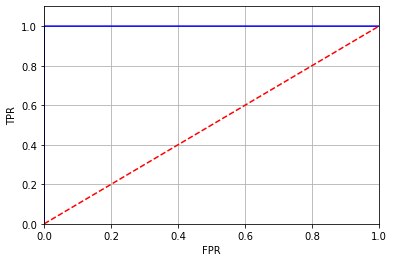

In [66]:
plt.plot(fpr4, tpr4, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for train data is shown as above with a AUC that's about 0.9999993474576271. The test error for training data set is about 0.005433333333333401

In [67]:
#test_error for test
test_error = clf.score(x_test, y_test)
test_error = 1 - test_error
test_error

0.006249999999999978

In [68]:
y_pred3 = clf.predict(x_test)
y_true3 = y_test

In [69]:
df3_confusion = pd.DataFrame(confusion_matrix(y_true3, y_pred3))
df3_confusion = df3_confusion.rename_axis(index = 'True', columns = 'Predicted')
df3_confusion

Predicted      0    1
True                 
0          15609   16
1             84  291

### Confusion matrix for test is shown as above.

In [70]:
y_score5 = clf.predict_proba(x_test)
fpr5, tpr5, thresholds5 = roc_curve(y_test.astype('int'), y_score5[:,1], pos_label = 1)
auc6 = auc(fpr5, tpr5)

In [71]:
auc6

0.9955887786666665

(0.0, 1.1)

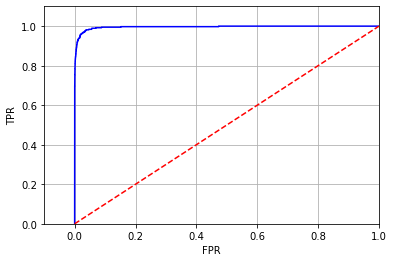

In [72]:
plt.plot(fpr5, tpr5, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.1,1)
plt.ylim(0,1.1)

### The ROC graph for train data is shown as above with a AUC that's about 0.9955887786666665. The test error for test data set is about 0.006249999999999978

### Overall the test error for the train data is lower than for the test data.

# (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 
# Train XGBosst with L1-penalized logistic regression at each node using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

In [73]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
clf.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
          

In [74]:
df8 = pd.DataFrame()
df8 = df8.assign(alpha = alphas, MTS = clf.cv_results_['mean_test_score'])

In [75]:
# test error
1 - max(df8.MTS)

0.0025084745762711247

In [76]:
df8[df8.MTS == df8.MTS.max()]

alpha       MTS
0   0.01  0.997492

In [77]:
y_true4 = y_train_smote
y_pred4 = clf.predict(x_train_smote)

In [78]:
df4_confusion = pd.DataFrame(confusion_matrix(y_true4, y_pred4))
df4_confusion = df4_confusion.rename_axis(index = 'True', columns = 'Predicted')
df4_confusion

Predicted      0      1
True                   
0          59000      0
1              1  58999

### Confusion matrix for train is shown as above.

In [79]:
y_score6 = clf.predict_proba(x_train_smote)
fpr6, tpr6, thresholds6 = roc_curve(y_train_smote.astype('int'), y_score6[:,1], pos_label = 1)
auc7 = auc(fpr6, tpr6)

In [80]:
auc7

0.9999996916116058

(0.0, 1.1)

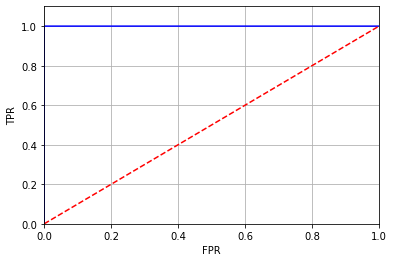

In [81]:
plt.plot(fpr6, tpr6, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for train data is shown as above with a AUC that's about 0.9999997022407354. The test error for training data set is about 0.002372881355932277.

In [82]:
x_test_smote, y_test_smote = smote.fit_resample(x_test, y_test)
clf.fit(x_test_smote, y_test_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
          

In [83]:
df9 = pd.DataFrame()
df9 = df9.assign(alpha = alphas, MTS = clf.cv_results_['mean_test_score'])

In [84]:
# test error for test
1 - max(df9.MTS)

0.0039999999999998925

In [85]:
y_true5 = y_test_smote
y_pred5 = clf.predict(x_test_smote)

In [86]:
df5_confusion = pd.DataFrame(confusion_matrix(y_true5, y_pred5))
df5_confusion = df5_confusion.rename_axis(index = 'True', columns = 'Predicted')
df5_confusion

Predicted      0      1
True                   
0          15625      0
1              0  15625

### Confusion matrix for test is shown as above.

In [87]:
y_score7 = clf.predict_proba(x_test_smote)
fpr7, tpr7, thresholds7 = roc_curve(y_test_smote.astype('int'), y_score7[:,1], pos_label = 1)
auc8 = auc(fpr7, tpr7)
auc8

1.0

(0.0, 1.1)

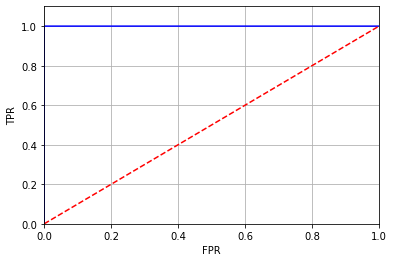

In [88]:
plt.plot(fpr7, tpr7, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for train data is shown as above with a AUC that's about 1. The test error for training data set is about 0.0042880000000000695.

### Overall in (f) the test error for the test data is lower than for the train data. As well as two of the test error for train and test data are lower than the two test error in problem (e)

# 2. ISLR 6.6.3

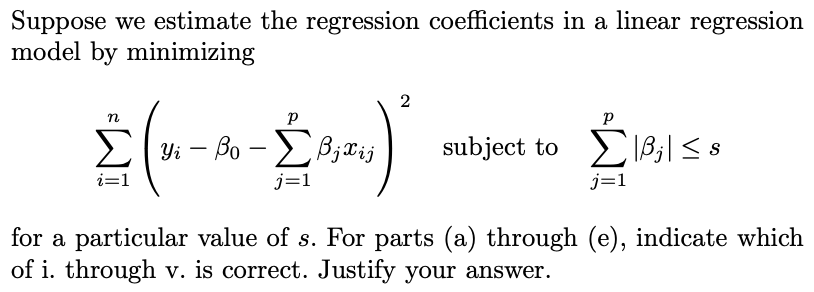

# (a) As we increase s from 0, the training RSS will:

### Steadily decrease. Becasue we are restricting the coefficients, which mean we are making model more flexible that is going to result a decrease of RSS

## (b) Repeat (a) for test RSS.

### Decrease initially, and then eventually start increasing in a U shape. As model become more flexible that is going to reduce test RSS first then start increase when overfitting. 

## (c) Repeat (a) for variance.

### Steadily increase since the model become more flexible.

## (d) Repeat (a) for (squared) bias

### Steadily decrease since the model become more flexible that increase the varuance.

## (e) Repeat (a) for the irreducible error.

### Remain constant since the irreducible error is independent parameter in the model.

# 3. ISLR, 6.4.5

# It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.
# Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore,
# suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: βˆ0 = 0.

## (a) Write out the ridge regression optimization problem in this setting.

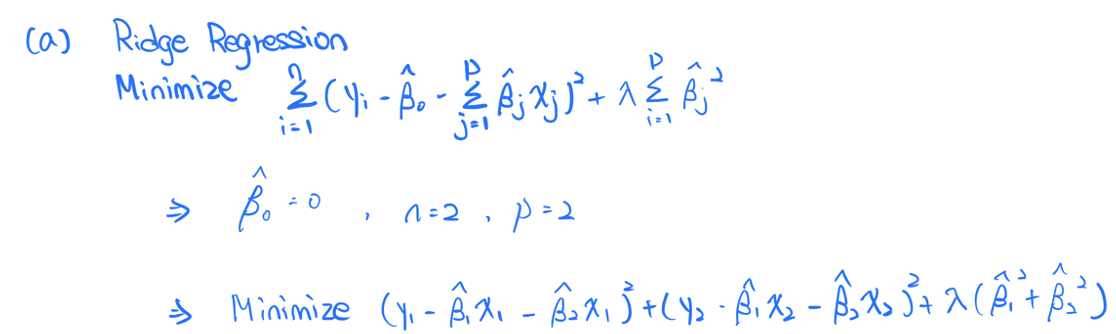

## (b) Argue that in this setting, the ridge coefficient estimates satisfy βˆ1 = βˆ2.

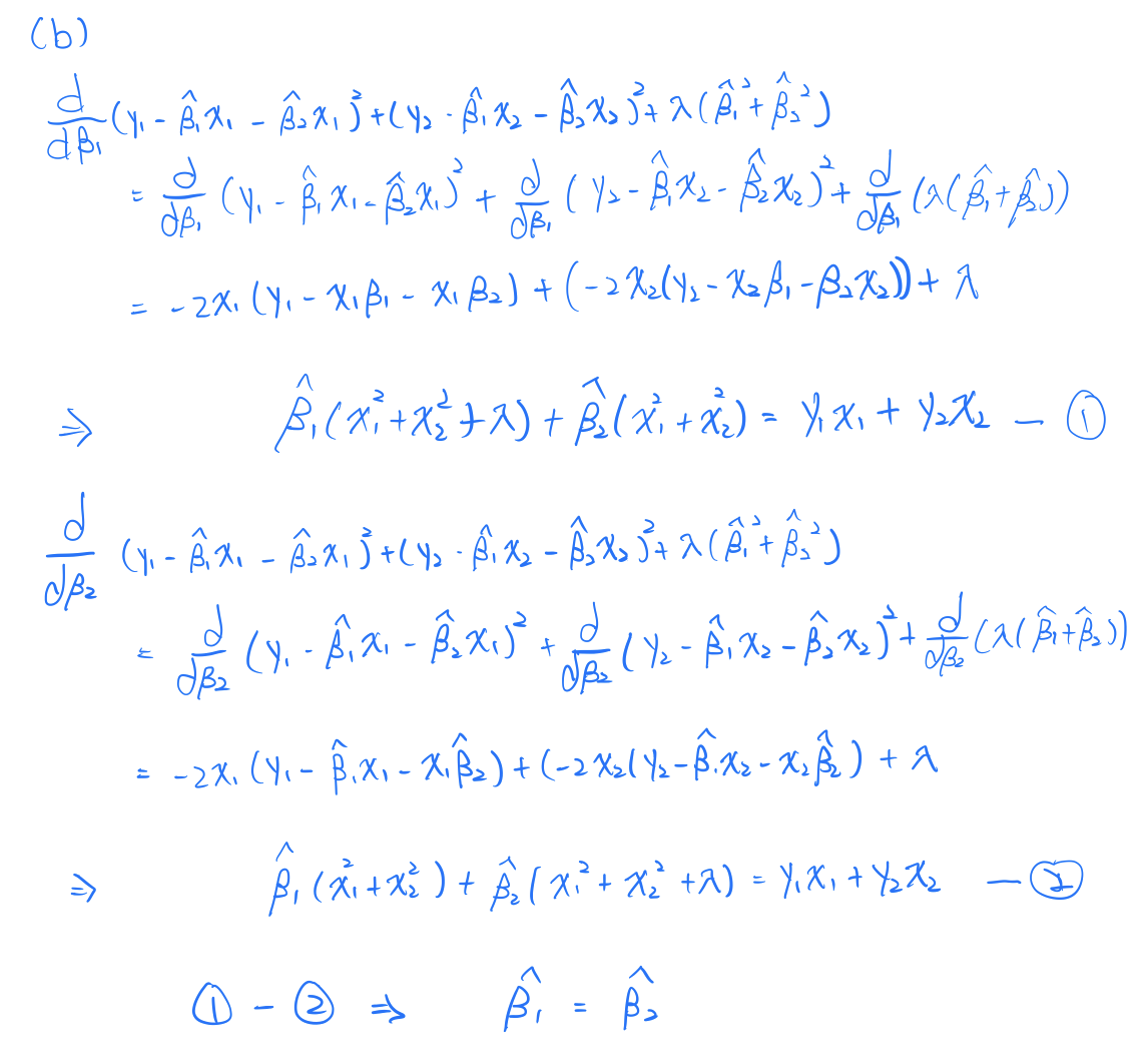

## (c) Write out the lasso optimization problem in this setting.

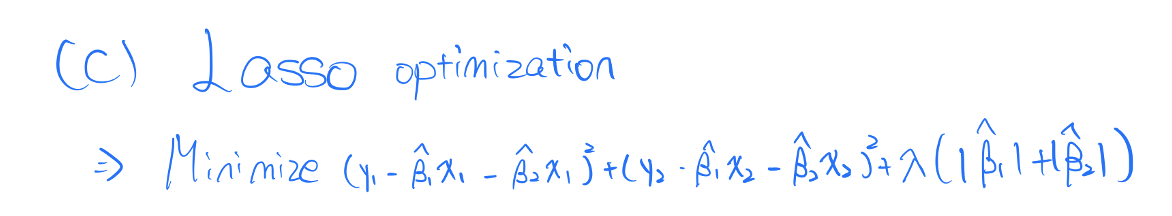

## (d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

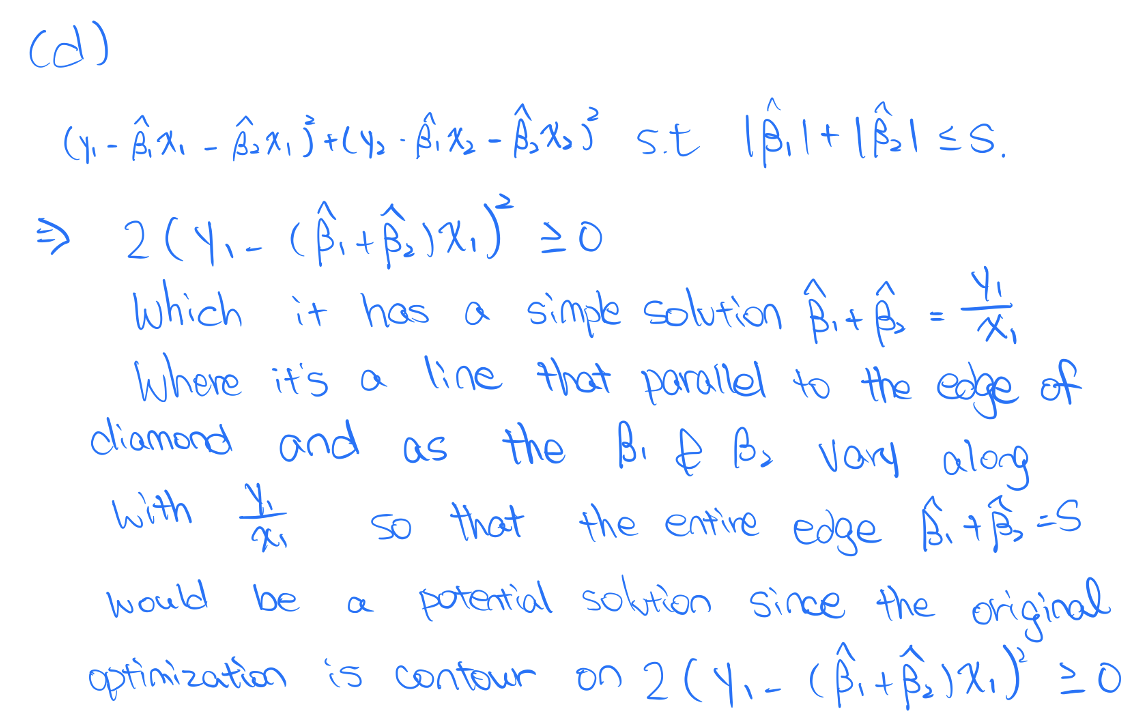

# 4. ISLR 8.4.5

# Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):

# 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

# There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

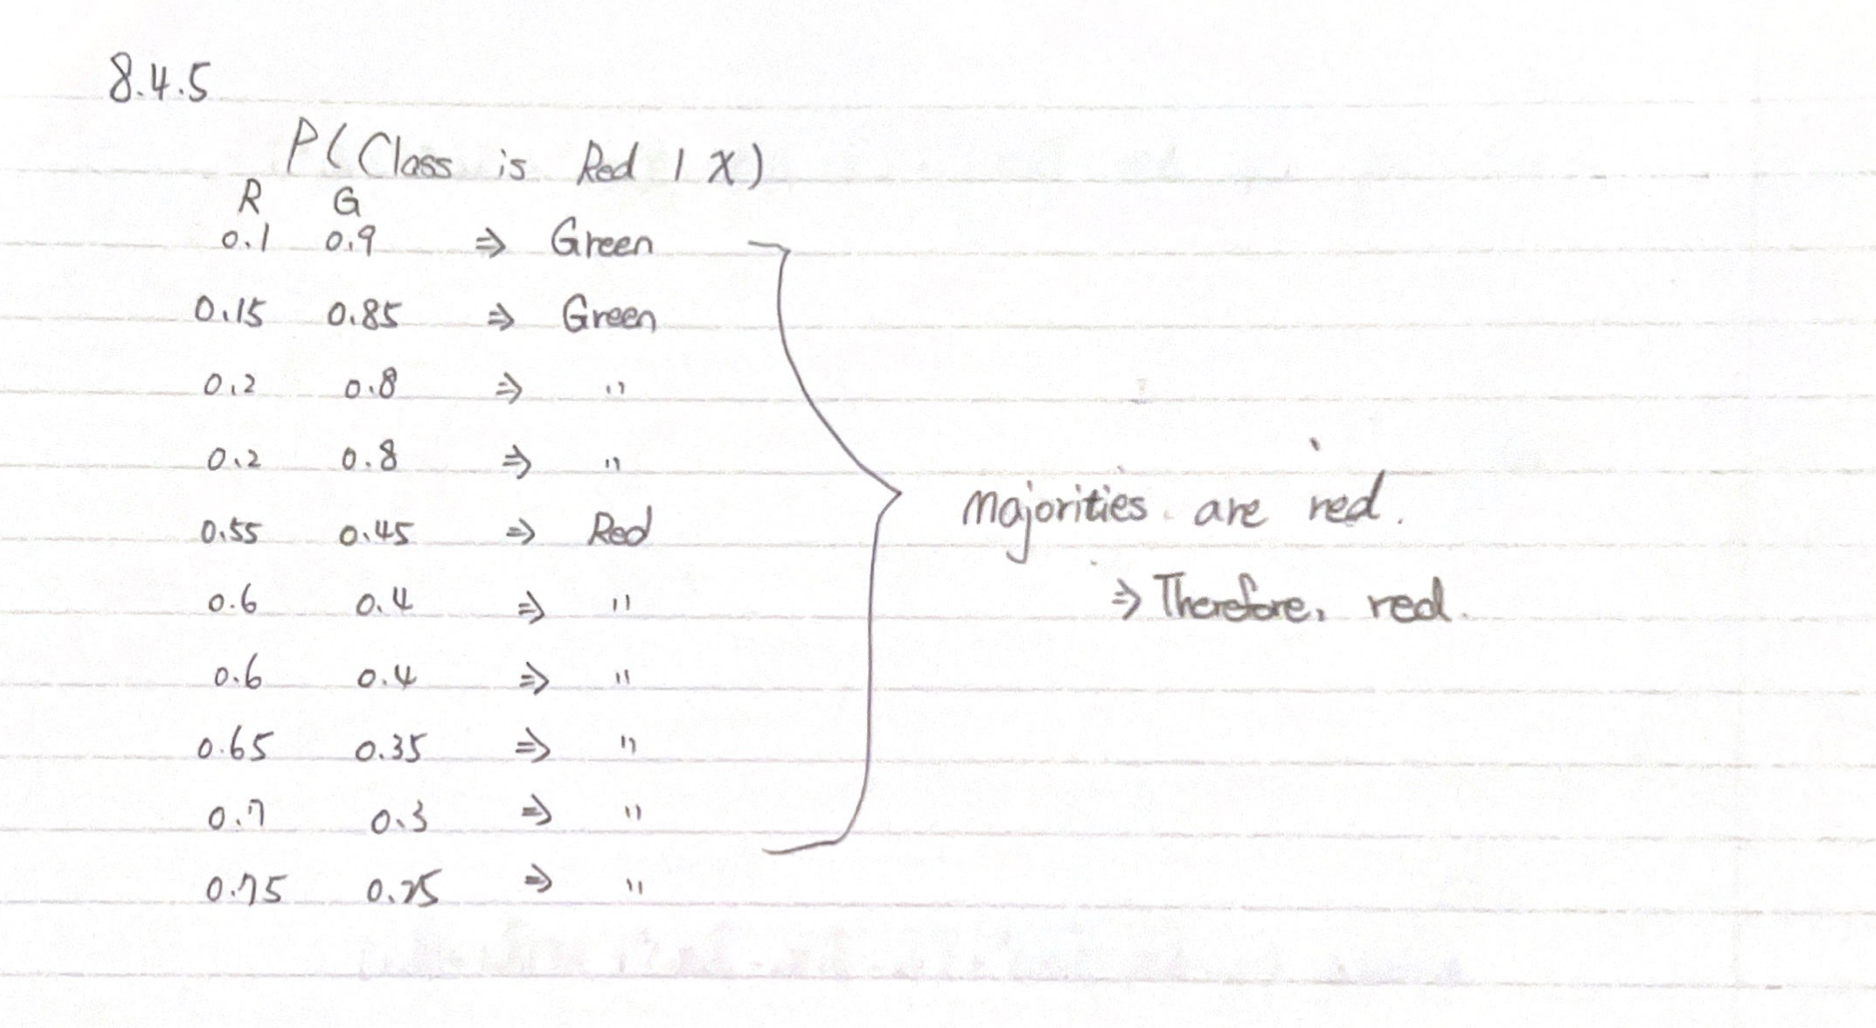

# 5. ISLR 9.7.3

## (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
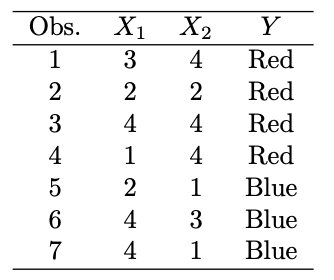
# Sketch the observations

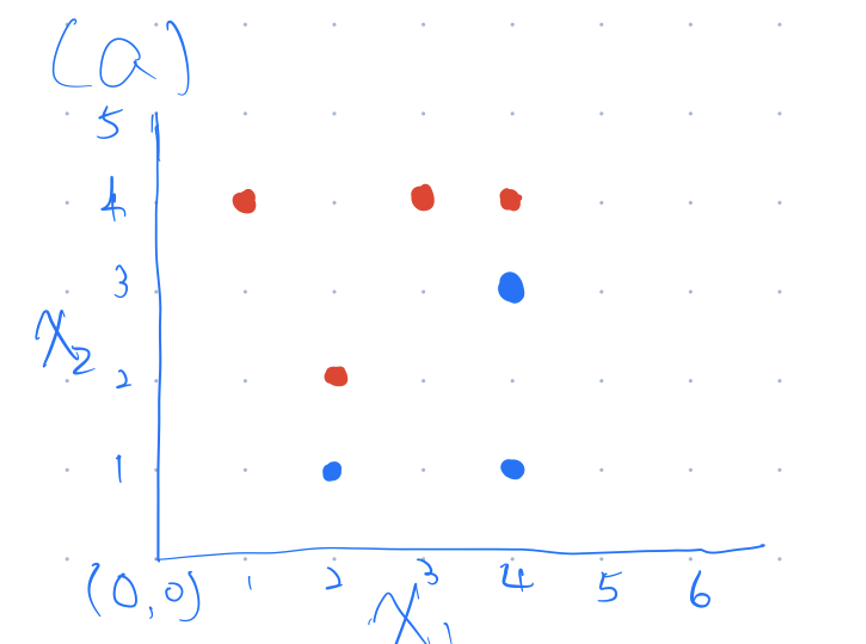

## (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).

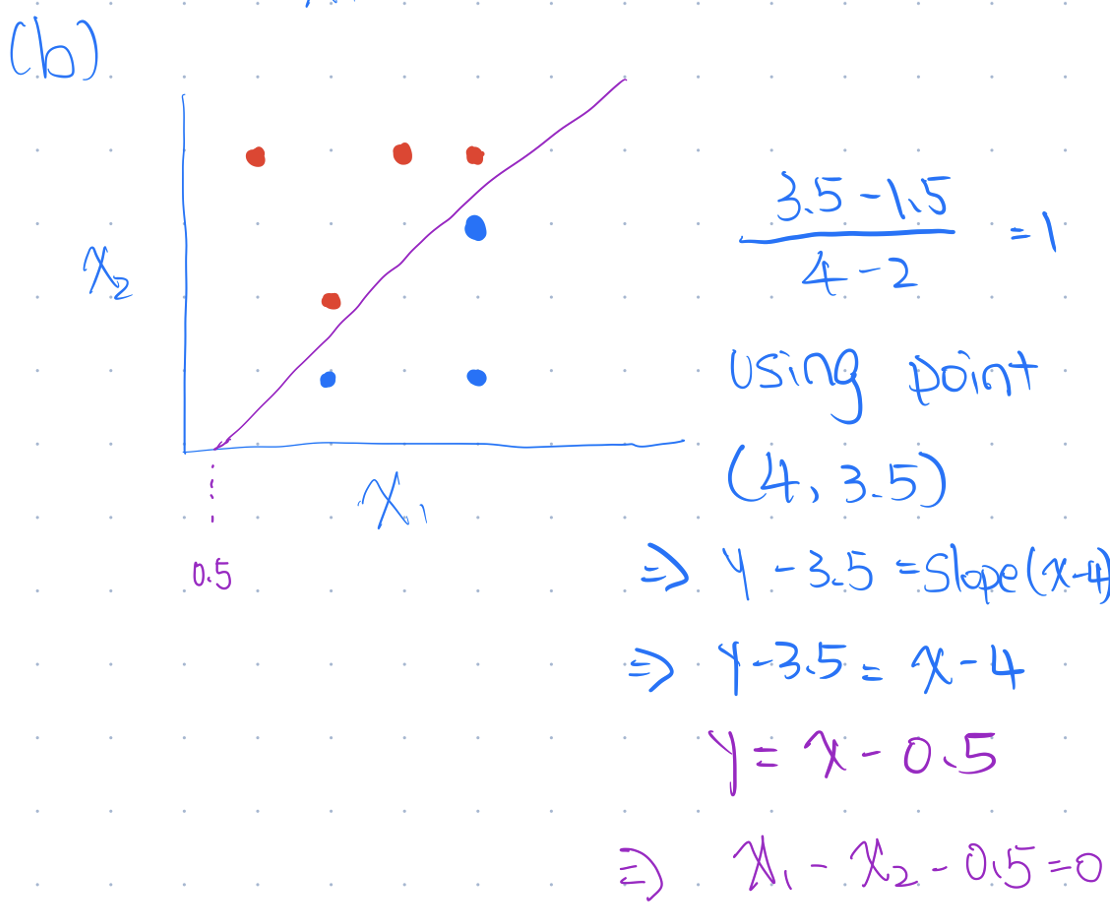

## (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

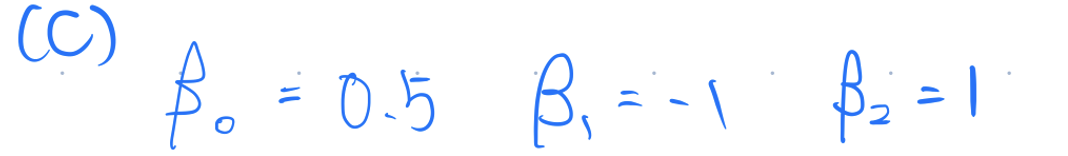

## (d) On your sketch, indicate the margin for the maximal margin hyperplane.

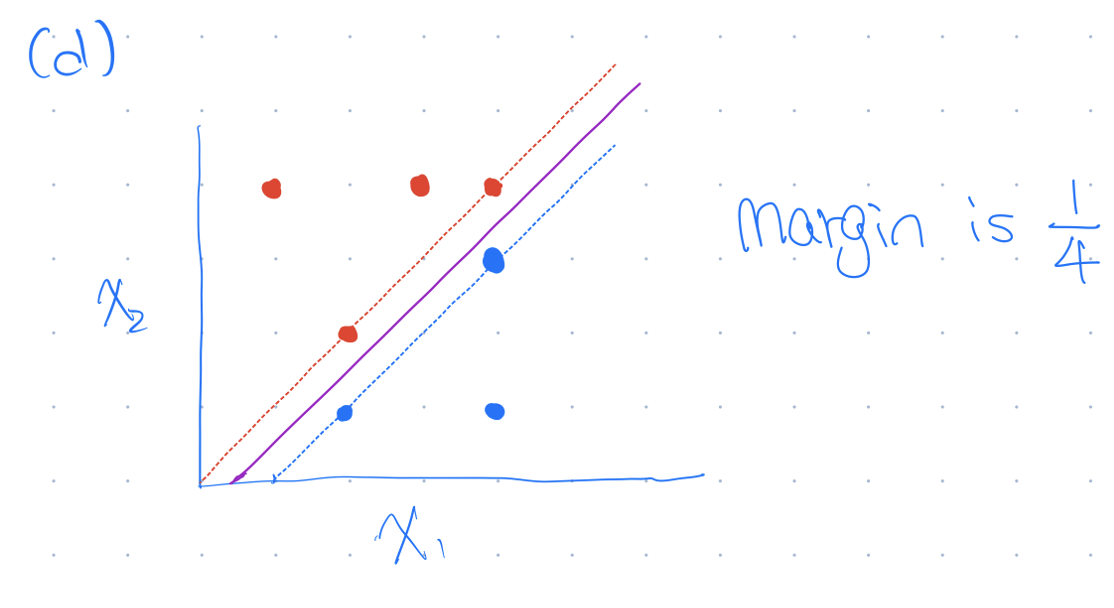

## (e) Indicate the support vectors for the maximal margin classifier.

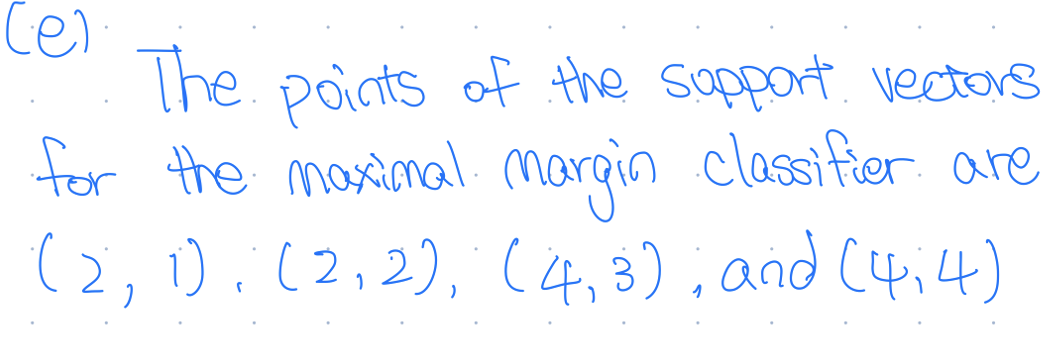

## (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

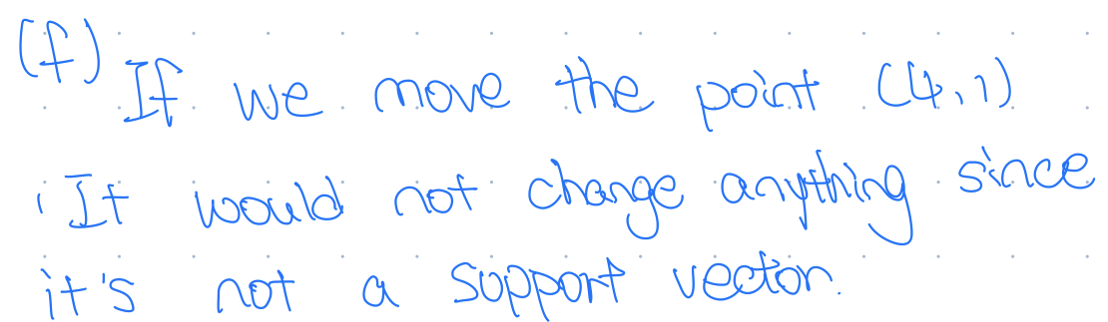

## (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

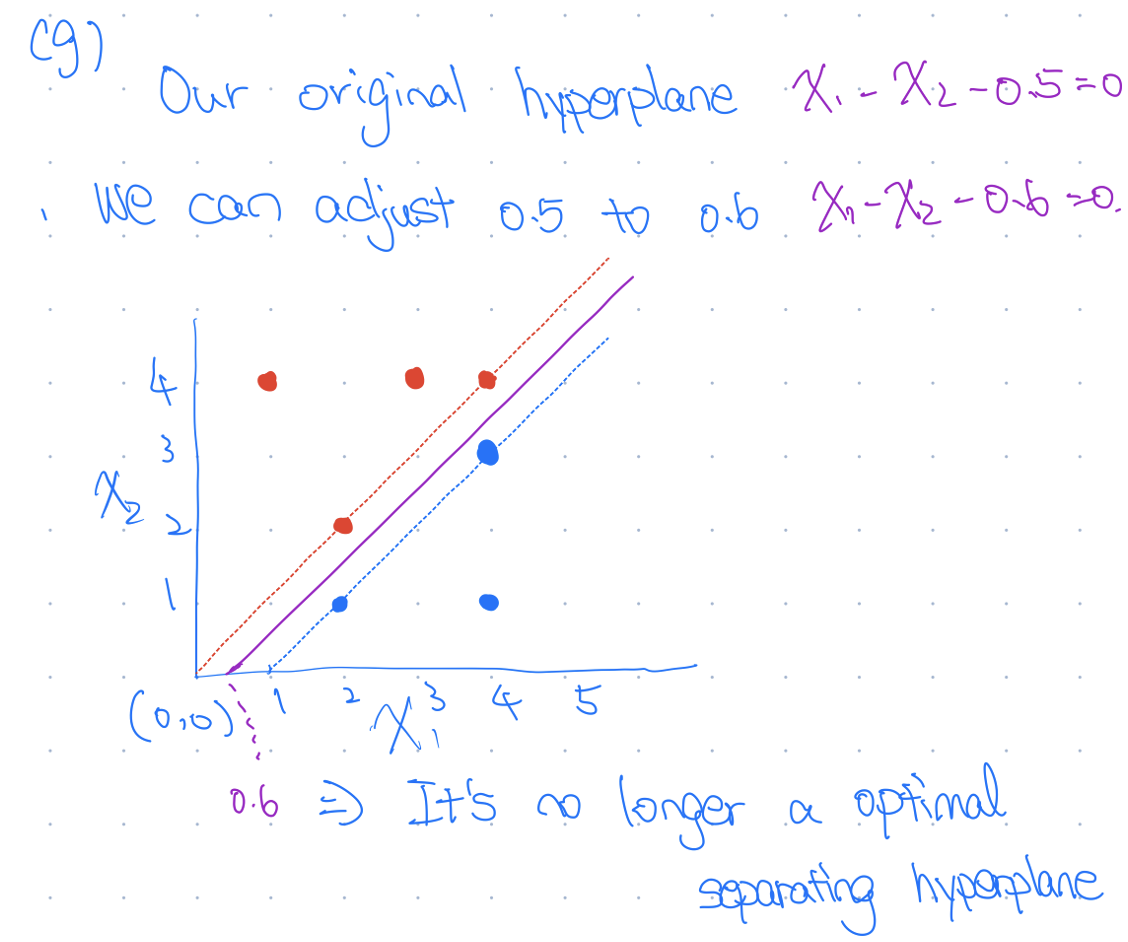

## (h) ) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

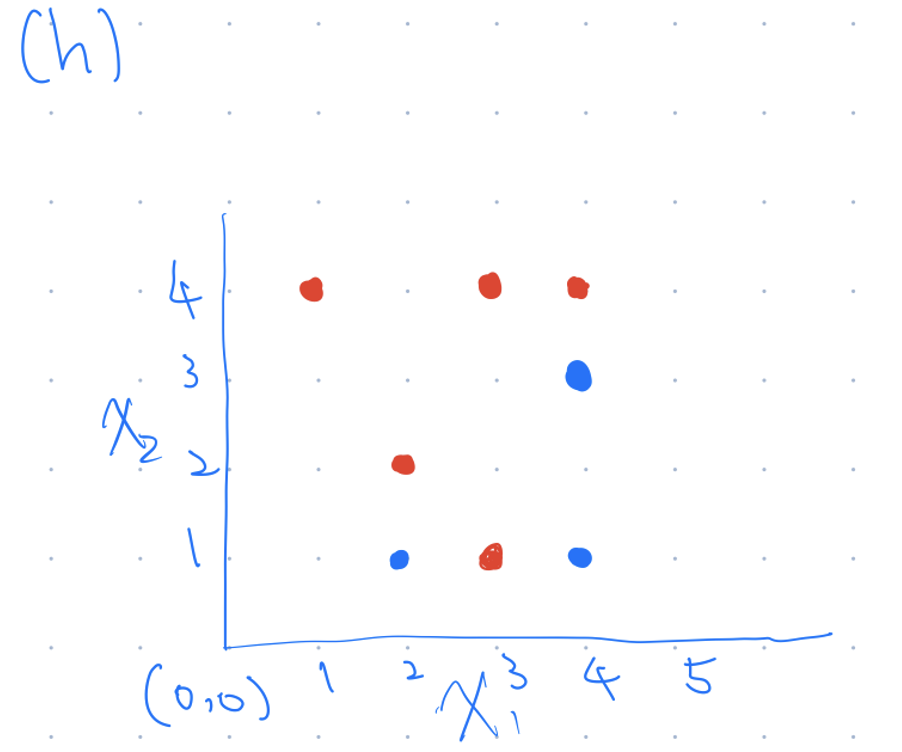